In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_cbd_lsa.csv")

In [3]:
df_knn

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..CBD
0,8,0.158467,0.230093,0.240255,-0.230257,-0.280443,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.001046
1,14,0.356758,-0.100188,-0.099331,-0.001421,0.006253,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.001046
2,15,0.341098,0.000528,-0.119240,-0.097021,-0.078687,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0.001046
3,18,0.173992,-0.041743,-0.059563,-0.156775,0.110850,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.001046
4,18,0.173992,-0.041743,-0.059563,-0.156775,0.110850,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.001046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,42969,0.109738,-0.066611,-0.064934,0.145920,-0.069040,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.001046
59996,42970,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.001046
59997,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.001046
59998,42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.001046


In [4]:
df_knn.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_knn.drop(['X..CBD', 'index'], axis = 1)
y = df_knn[['X..CBD']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.00104646],
       [0.00104646],
       [0.00104646],
       ...,
       [0.00104646],
       [0.00104646],
       [0.00104646]])

<AxesSubplot:ylabel='Count'>

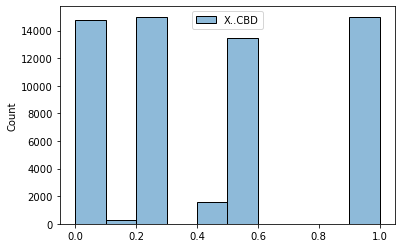

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [11]:
mean_absolute_error(y_val, y_pred_knreg)

0.04523145918137025

In [12]:
mean_squared_error(y_val, y_pred_knreg)

0.02866180388921091

In [13]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.16929797367130803

In [14]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8790299893399234

In [15]:
#val
r2_score(y_val, y_pred_knreg)

0.7866542794640496

Residual plots for each target variable

Feature Selection

In [16]:
rfreg = RandomForestRegressor()

In [17]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [18]:
selector.estimator_.feature_importances_

array([9.31008603e-02, 9.29842924e-02, 1.06706099e-01, 1.89282554e-01,
       1.22442499e-01, 4.03798023e-02, 1.90840878e-02, 2.60722714e-02,
       7.23963755e-05, 1.86559175e-03, 5.74295244e-03, 0.00000000e+00,
       8.71062220e-03, 8.19341365e-05, 6.23462074e-03, 5.52542105e-03,
       7.50154894e-03, 1.07784433e-02, 2.27100771e-07, 1.90695345e-02,
       1.33358778e-19, 0.00000000e+00, 3.85831945e-03, 7.01016178e-03,
       1.87339329e-02, 2.44448301e-03, 7.93133277e-03, 8.24819854e-05,
       0.00000000e+00, 3.23141253e-03, 1.11769757e-02, 0.00000000e+00,
       5.58072715e-03, 0.00000000e+00, 0.00000000e+00, 5.76624835e-03,
       5.49554735e-03, 4.69240896e-03, 6.63436761e-04, 7.67446716e-05,
       4.24931630e-05, 4.26946100e-03, 1.56526826e-04, 1.13970592e-02,
       1.10225881e-03, 3.62113064e-03, 1.23039952e-03, 4.33099382e-04,
       8.18200358e-03, 7.77393279e-04, 9.99461220e-03, 6.20866626e-03,
       2.06904829e-03, 7.74543961e-04, 4.62273239e-03, 1.07421598e-03,
      

In [19]:
selector.threshold_

0.011627906976744186

In [20]:
mask = selector.get_support()

In [21]:
mask

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False])

In [22]:
selected_features = X.columns[mask]

In [23]:
selected_X = df_knn[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,euphoric,happy,pine,sweet
0,0.158467,0.230093,0.240255,-0.230257,-0.280443,1,0,0,0,1,0,0
1,0.356758,-0.100188,-0.099331,-0.001421,0.006253,1,0,0,1,0,0,0
2,0.341098,0.000528,-0.119240,-0.097021,-0.078687,1,0,0,0,1,0,0
3,0.173992,-0.041743,-0.059563,-0.156775,0.110850,1,0,0,0,1,0,0
4,0.173992,-0.041743,-0.059563,-0.156775,0.110850,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.109738,-0.066611,-0.064934,0.145920,-0.069040,0,1,0,1,1,0,0
59996,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,1,0,0,0,0,0
59997,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,1,1,0,0
59998,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,0,0,0


In [24]:
selected_X.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'euphoric',
 'happy',
 'pine',
 'sweet']

In [25]:
import joblib

joblib.dump(selected_X, "selected_X_knn_lsa_elbow_cbd.pkl")
joblib.dump(selector, "selector_knn_lsa_elbow_cbd.pkl")

['selector_knn_lsa_elbow_cbd.pkl']

Train test split (after Feature Selection)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [27]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [28]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [29]:
mean_absolute_error(y_val, y_pred_knreg)

0.038879947451383276

In [30]:
mean_squared_error(y_val, y_pred_knreg)

0.023948410397196678

In [31]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.15475273954666094

In [32]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.901159840478119

In [33]:
#val
r2_score(y_val, y_pred_knreg)

0.8217092747804522

Hyperparameter Tuning

In [34]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [35]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [36]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [37]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [54]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [55]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.028970639278199598

In [56]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.13629655396634627

In [57]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9904719925079404

In [58]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.8617001176327308

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [59]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [60]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_lsa_elbow_cbd.pkl")
joblib.dump(y_test, "y_test_knreg_lsa_elbow_cbd.pkl")

['y_test_knreg_lsa_elbow_cbd.pkl']

In [61]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.027211620210899658

In [62]:
mean_squared_error(y_test, y_pred_knreg_test)

0.017141912280232995

In [63]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.13092712583812796

In [64]:
r2_score(y_test, y_pred_knreg_test)

0.8709302961253863

In [65]:
y_test

,X..CBD
15281,0.534533
21435,0.240163
44536,1.000000
13518,0.534533
47529,1.000000
...,...
6636,0.016743
25027,0.240163
8294,0.534533
16607,0.534533


In [66]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

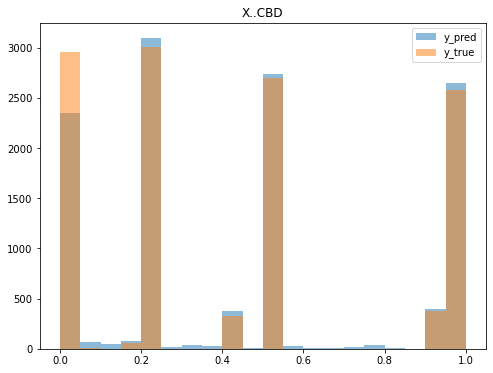

<Figure size 432x288 with 0 Axes>

In [67]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..CBD"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_lsa_elbow_cbd.png')

Pearson R

In [68]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.936
P-value: 0.000


<AxesSubplot:>

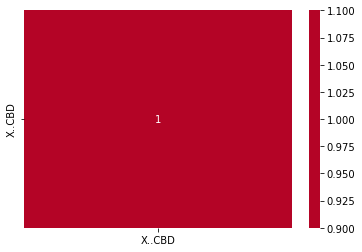

In [69]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)